# Pure Python

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'matplotlib'

In [29]:
dataset = pd.read_csv('./train.csv')
dataset

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [30]:
dataset = dataset.dropna()

<AxesSubplot:xlabel='x', ylabel='y'>

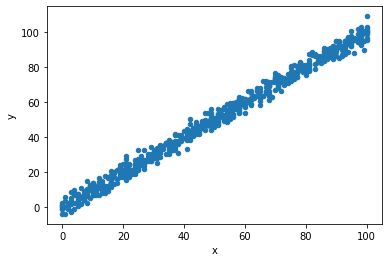

In [31]:
dataset.plot(x = 'x', y = 'y', kind = 'scatter')

In [62]:
#theta0 = np.array([np.arange(-100,100,0.1)])
#theta1 = np.array([np.arange(-1,1,0.001)])
theta0 = np.array([np.linspace(-500, 500, num=1000)])
theta1 = np.array([np.linspace(-10, 10, num = 1000)])
m = len(dataset.index)
theta0, theta1 = np.meshgrid(theta0, theta1)
x_values = np.array(dataset['x'])
y_values = np.array(dataset['y'])
cost_func = np.zeros((1000,1000))
for idx,x in np.ndenumerate(x_values):
    h = x*theta1 + theta0
    h = h - y_values[idx]
    h = h**2
    cost_func = cost_func + h

In [63]:
cost_func = (1/(2*m))*cost_func

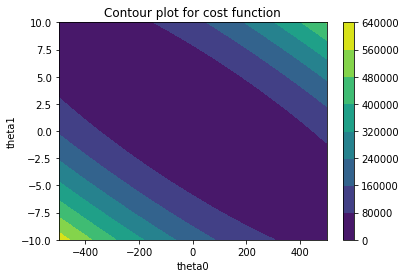

In [71]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(theta0, theta1, cost_func)
fig.colorbar(cp)
ax.set_title('Contour plot for cost function')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
plt.show()

## Gradient Descent

In [142]:
theta0_old = 1
theta1_old = 1
theta0 = 0
theta1 = 0
alpha = 0.0005
iterations = 1000
while(iterations!=0 or abs(theta0 - theta0_old)>0.0001 or abs(theta1 - theta1_old)>0.0001):
    theta0_old = theta0
    theta1_old = theta1
    iterations-=1
    #print(theta0, theta1)
    theta0 = theta0_old - (alpha/m)*(((theta1_old*x_values + theta0_old) - y_values).sum())
    theta1 = theta1_old - (alpha/m)*((((theta1_old*x_values + theta0_old) - y_values)*x_values).sum())
print(theta0, theta1)

0.0005633184400825459 0.9990409172960066


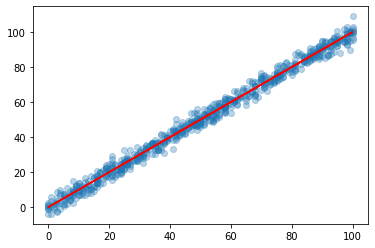

In [143]:
plt.scatter(x_values, y_values, alpha=0.3)
y = theta0 + theta1*x_values
plt.plot(x_values, y, color='red')

In [144]:
testset = pd.read_csv('./test.csv')

In [145]:
y_predicted = theta0 + theta1*testset['x']

## RMSE

In [146]:
rmse = (((np.array(testset['y']) - np.array(y_predicted))**2).sum()/len(testset.index))**(1/2)
rmse

3.0747349515368363

In [147]:
y_predicted

0      76.926714
1      20.980423
2      21.979463
3      19.981382
4      35.966036
         ...    
295    70.932468
296    45.956446
297    54.947814
298    61.941100
299    46.955486
Name: x, Length: 300, dtype: float64

In [148]:
testset['y']

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

## scikit learn

In [149]:
from sklearn.linear_model import LinearRegression

In [151]:
regr = LinearRegression()
regr.fit(x_values.reshape(-1,1), y_values.reshape(-1,1))
regr.score(np.array(testset['x']).reshape(-1,1), np.array(testset['y']).reshape(-1,1))

0.9888014444327563

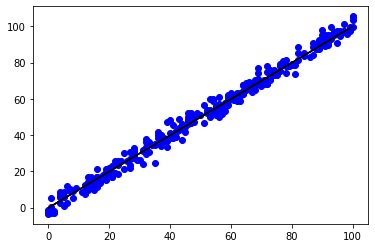

In [153]:
y_pred = regr.predict(np.array(testset['x']).reshape(-1,1))
plt.scatter(np.array(testset['x']).reshape(-1,1), np.array(testset['y']).reshape(-1,1), color ='b') 
plt.plot(np.array(testset['x']).reshape(-1,1), y_pred, color ='k') 
  
plt.show()